In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import yaml
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
import sacc
import pacc
import random
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rc('legend',fontsize=18)

## p(z)'s

In [2]:
z = np.linspace(0.0, 3.0, 301)

In [3]:
bins_0 = np.load("/home/jaimerz/Downloads/lens_0.npz")['pdfs']
sel = np.random.choice(bins_0.shape[0], 5000, replace=False)
bins_0 = bins_0[sel]
nz = np.sum(bins_0, axis=0)/len(bins_0)

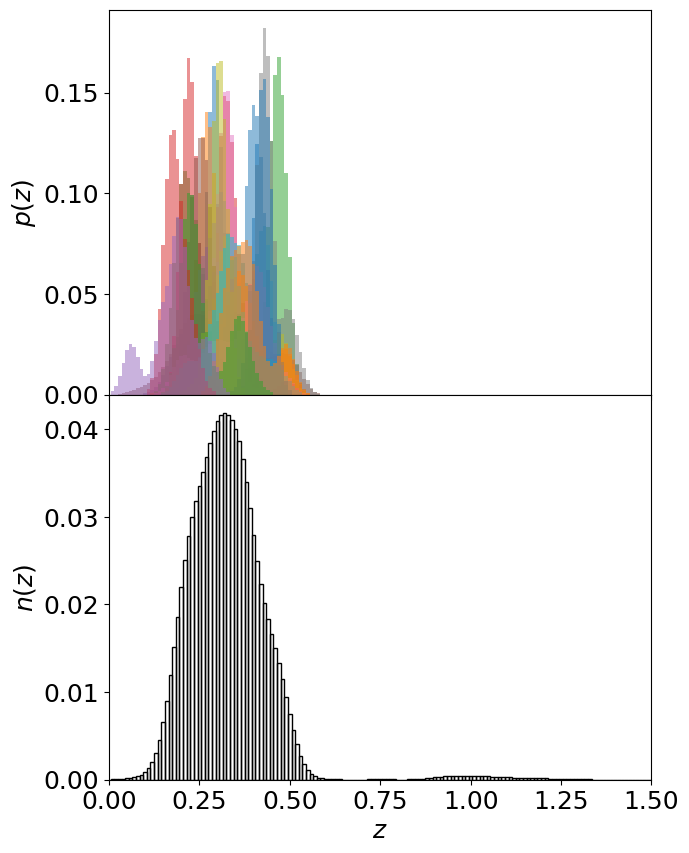

In [4]:
figure, axis = plt.subplots(2, 1, figsize=(7, 10))
plt.subplots_adjust(wspace=0, hspace=0)

for i in np.arange(25):
    axis[0].bar(z, bins_0[i], width=0.01, alpha=0.5)
axis[0].set_xlim(0, 1.5)
axis[0].set_ylabel(r"$p(z)$")
axis[0].set_xticklabels([])

axis[1].bar(z, nz, width=0.01, color='black', fill=False)
axis[1].set_xlim(0, 1.5)

axis[1].set_xlabel(r"$z$")
axis[1].set_ylabel(r"$n(z)$")
plt.show()

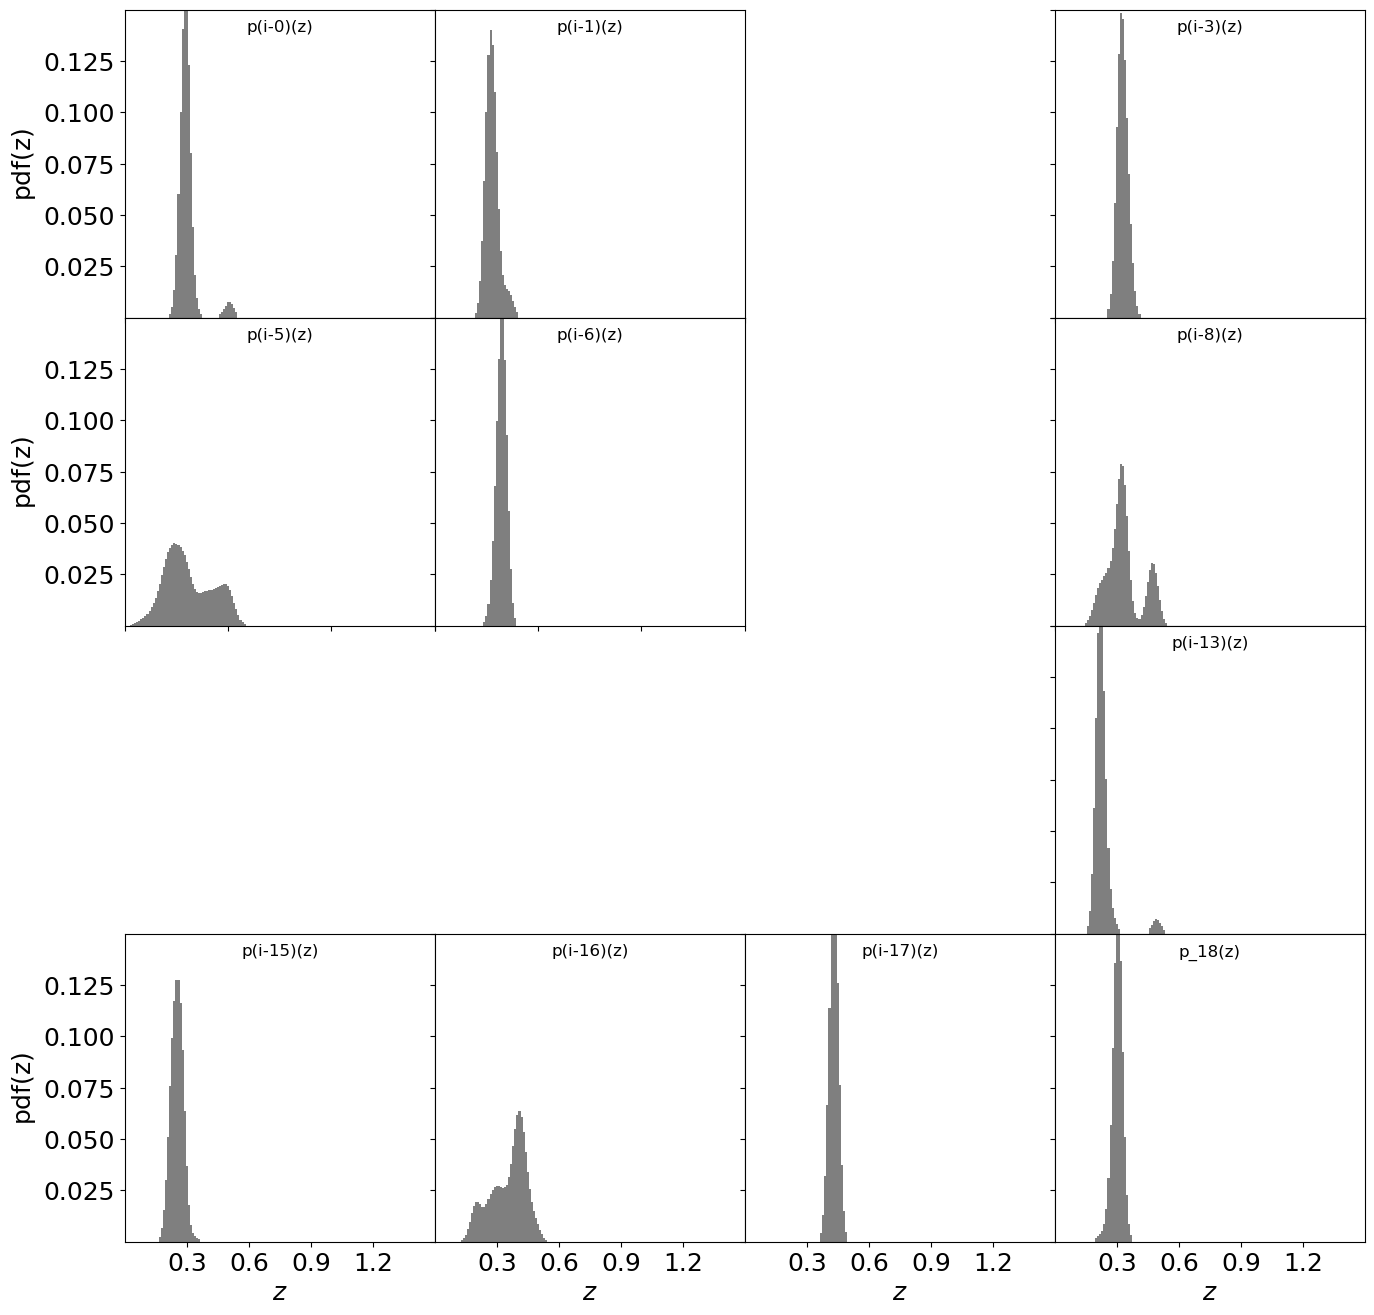

In [5]:
n = 4
figure, axis = plt.subplots(n, n, figsize=(n*4, n*4))
plt.subplots_adjust(wspace=0, hspace=0)
for i in np.arange(n):
    for j in np.arange(n):
        if ((i+2 == n) or (j+2 == n)) and ((i != n-1) and (j != n-1)):
            axis[i, j].axis("off")
        else:
            axis[i, j].bar(z, bins_0[i*5+j], width=0.01,
                        color="k", alpha=0.5)
            axis[i, j].set_ylim(0, 0.15)
            axis[i, j].set_xlim(0, 1.5)
            if (i == n-1) and (j == n-1):
                axis[i, j].set_title(r"p_{}(z)".format(i*5+j), y=0.9)
            else:
                axis[i, j].set_title(r"p(i-{})(z)".format(i*5+j), y=0.9)
            if i == n-1:
                axis[i, j].set_xlabel(r"$z$")
                axis[i, j].set_xticks([0.3, 0.6, 0.9, 1.2])
            else:
                axis[i, j].set_xticklabels([])
            if j == 0:
                axis[i, j].set_ylabel(r"$\rm{pdf}(z)$")
                axis[i, j].set_yticks([0.025, 0.050, 0.075, 0.1, 0.125])
            else:
                axis[i, j].set_yticklabels([])
plt.show()

In [6]:
import scipy
from scipy.interpolate import interp1d
rs      = np.array([np.random.uniform() for i in np.arange(n)])
cdfs    = [np.cumsum(pdf) for pdf in bins_0]
cdfs_i  = [interp1d(cdf, z, fill_value='extrapolate') for cdf in cdfs]  
samples = [cdf_i(rs) for cdf_i in cdfs_i]
samples = np.array(samples)

/home/jaimerz/anaconda3/envs/tutorials/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


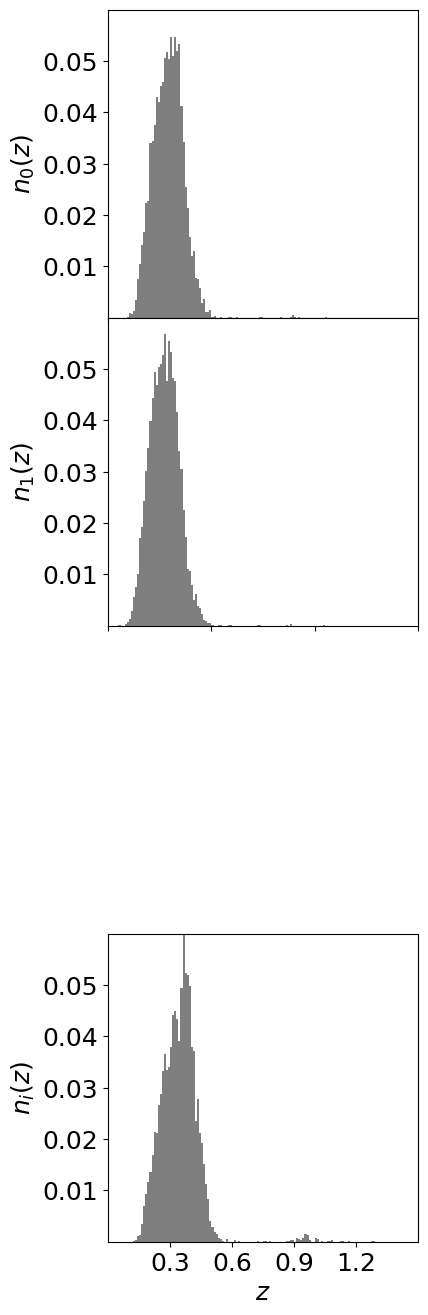

In [7]:
figure, axis = plt.subplots(n, 1, figsize=(n, n*4))
plt.subplots_adjust(wspace=0, hspace=0)
for i in np.arange(n):
    if i==n-2:
        axis[i].axis("off")
    else:
        hist = np.histogram(samples.T[i], bins=z)
        z_ = 0.5*(hist[1][:-1]+hist[1][1:])
        hist = hist[0]/np.sum(hist[0])
        #axis[i].plot(z_, hist)
        axis[i].bar(z_, hist, width=0.01, color="k", alpha=0.5)
        axis[i].set_xlim(0, 1.5)
        axis[i].set_ylim(0, 0.06)
        if i == n-1:
            axis[i].set_xlabel(r"$z$")
            axis[i].set_xticks([0.3, 0.6, 0.9, 1.2])
        else:
            axis[i].set_xticklabels([])
        axis[i].set_yticks([0.01, 0.02, 0.03, 0.04, 0.05])
        if i < n-1:
            axis[i].set_ylabel(r"$n_{}(z)$".format(i))
        else:
            axis[i].set_ylabel(r"$n_i(z)$")


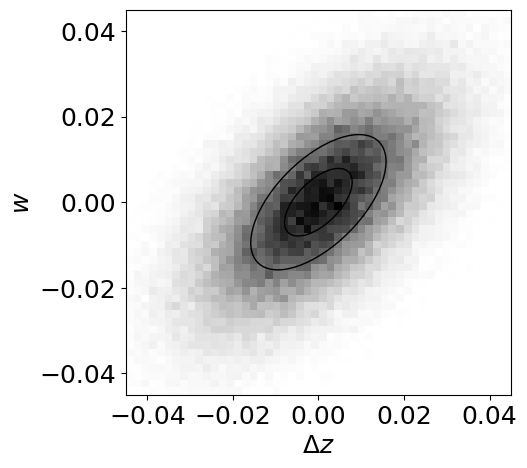

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy.stats import multivariate_normal

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal

#------------------------------------------------------------
# Define the mean, principal axes, and rotation of the ellipse
mean = np.array([0, 0])
sigma_1 = 0.02
sigma_2 = 0.01
alpha = np.pi / 4

#------------------------------------------------------------
# Draw 10^5 points from a multivariate normal distribution
#
#   we use the bivariate_normal function from astroML.  A more
#   general function for this is numpy.random.multivariate_normal(),
#   which requires the user to specify the full covariance matrix.
#   bivariate_normal() generates this covariance matrix for the
#   given inputs.
np.random.seed(0)
x, cov = bivariate_normal(mean, sigma_1, sigma_2, alpha, size=100000,
                          return_cov=True)

sigma_x = np.sqrt(cov[0, 0])
sigma_y = np.sqrt(cov[1, 1])
sigma_xy = cov[0, 1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# plot a 2D histogram/hess diagram of the points
H, bins = np.histogramdd(x, bins=2 * [np.linspace(-0.045, 0.045, 51)])
ax.imshow(H, origin='lower', cmap=plt.cm.binary, interpolation='nearest',
          extent=[bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2):
    ax.add_patch(Ellipse(mean, N * sigma_1, N * sigma_2,
                         angle=alpha * 180. / np.pi, lw=1,
                         ec='k', fc='none'))

kwargs = dict(ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\Delta z$')
ax.set_ylabel(r'$w$')

plt.show()

## Load Data

In [9]:
s_wlwl = sacc.Sacc.load_fits("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_wlwl = yaml.load(open("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/wlwl.yml"), Loader=yaml.FullLoader)

s_gcgc = sacc.Sacc.load_fits("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_gcgc = yaml.load(open("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc.yml"), Loader=yaml.FullLoader)

s_3x2 = sacc.Sacc.load_fits("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc")
y_3x2 = yaml.load(open("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/gcgc_gcwl_wlwl.yml"), Loader=yaml.FullLoader)

In [10]:
cle_3x2  = pacc.ClsEnsemble(s_3x2, y_3x2,   label="CosmoDC2 3x2  - data")
cle_wlwl = pacc.ClsEnsemble(s_wlwl, y_wlwl, label="CosmoDC2 wlwl - data")
cle_gcgc = pacc.ClsEnsemble(s_gcgc, y_gcgc, label="CosmoDC2 gcgc - data")

In [11]:
t_3x2  = pd.read_csv("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/CosmoDC2_3x2_theory_photo_bpz_best.csv")
t_gcgc = pd.read_csv("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/CosmoDC2_gcgc_theory_photo_bpz_best.csv")
t_wlwl = pd.read_csv("/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/CosmoDC2_wlwl_theory_photo_bpz_best.csv")

In [12]:
t_3x2 = np.array(t_3x2).T[0]
t_gcgc = np.array(t_gcgc).T[0]
t_wlwl = np.array(t_wlwl).T[0]

In [13]:
t_cle_3x2 = pacc.ClTheoryEnsemble(cle_3x2, t_3x2, label="CosmoDC2 3x2  - theory")
t_cle_gcgc = pacc.ClTheoryEnsemble(cle_gcgc, t_gcgc, label="CosmoDC2 gcgc - theory")
t_cle_wlwl = pacc.ClTheoryEnsemble(cle_wlwl, t_wlwl, label="CosmoDC2 wlwl - theory")

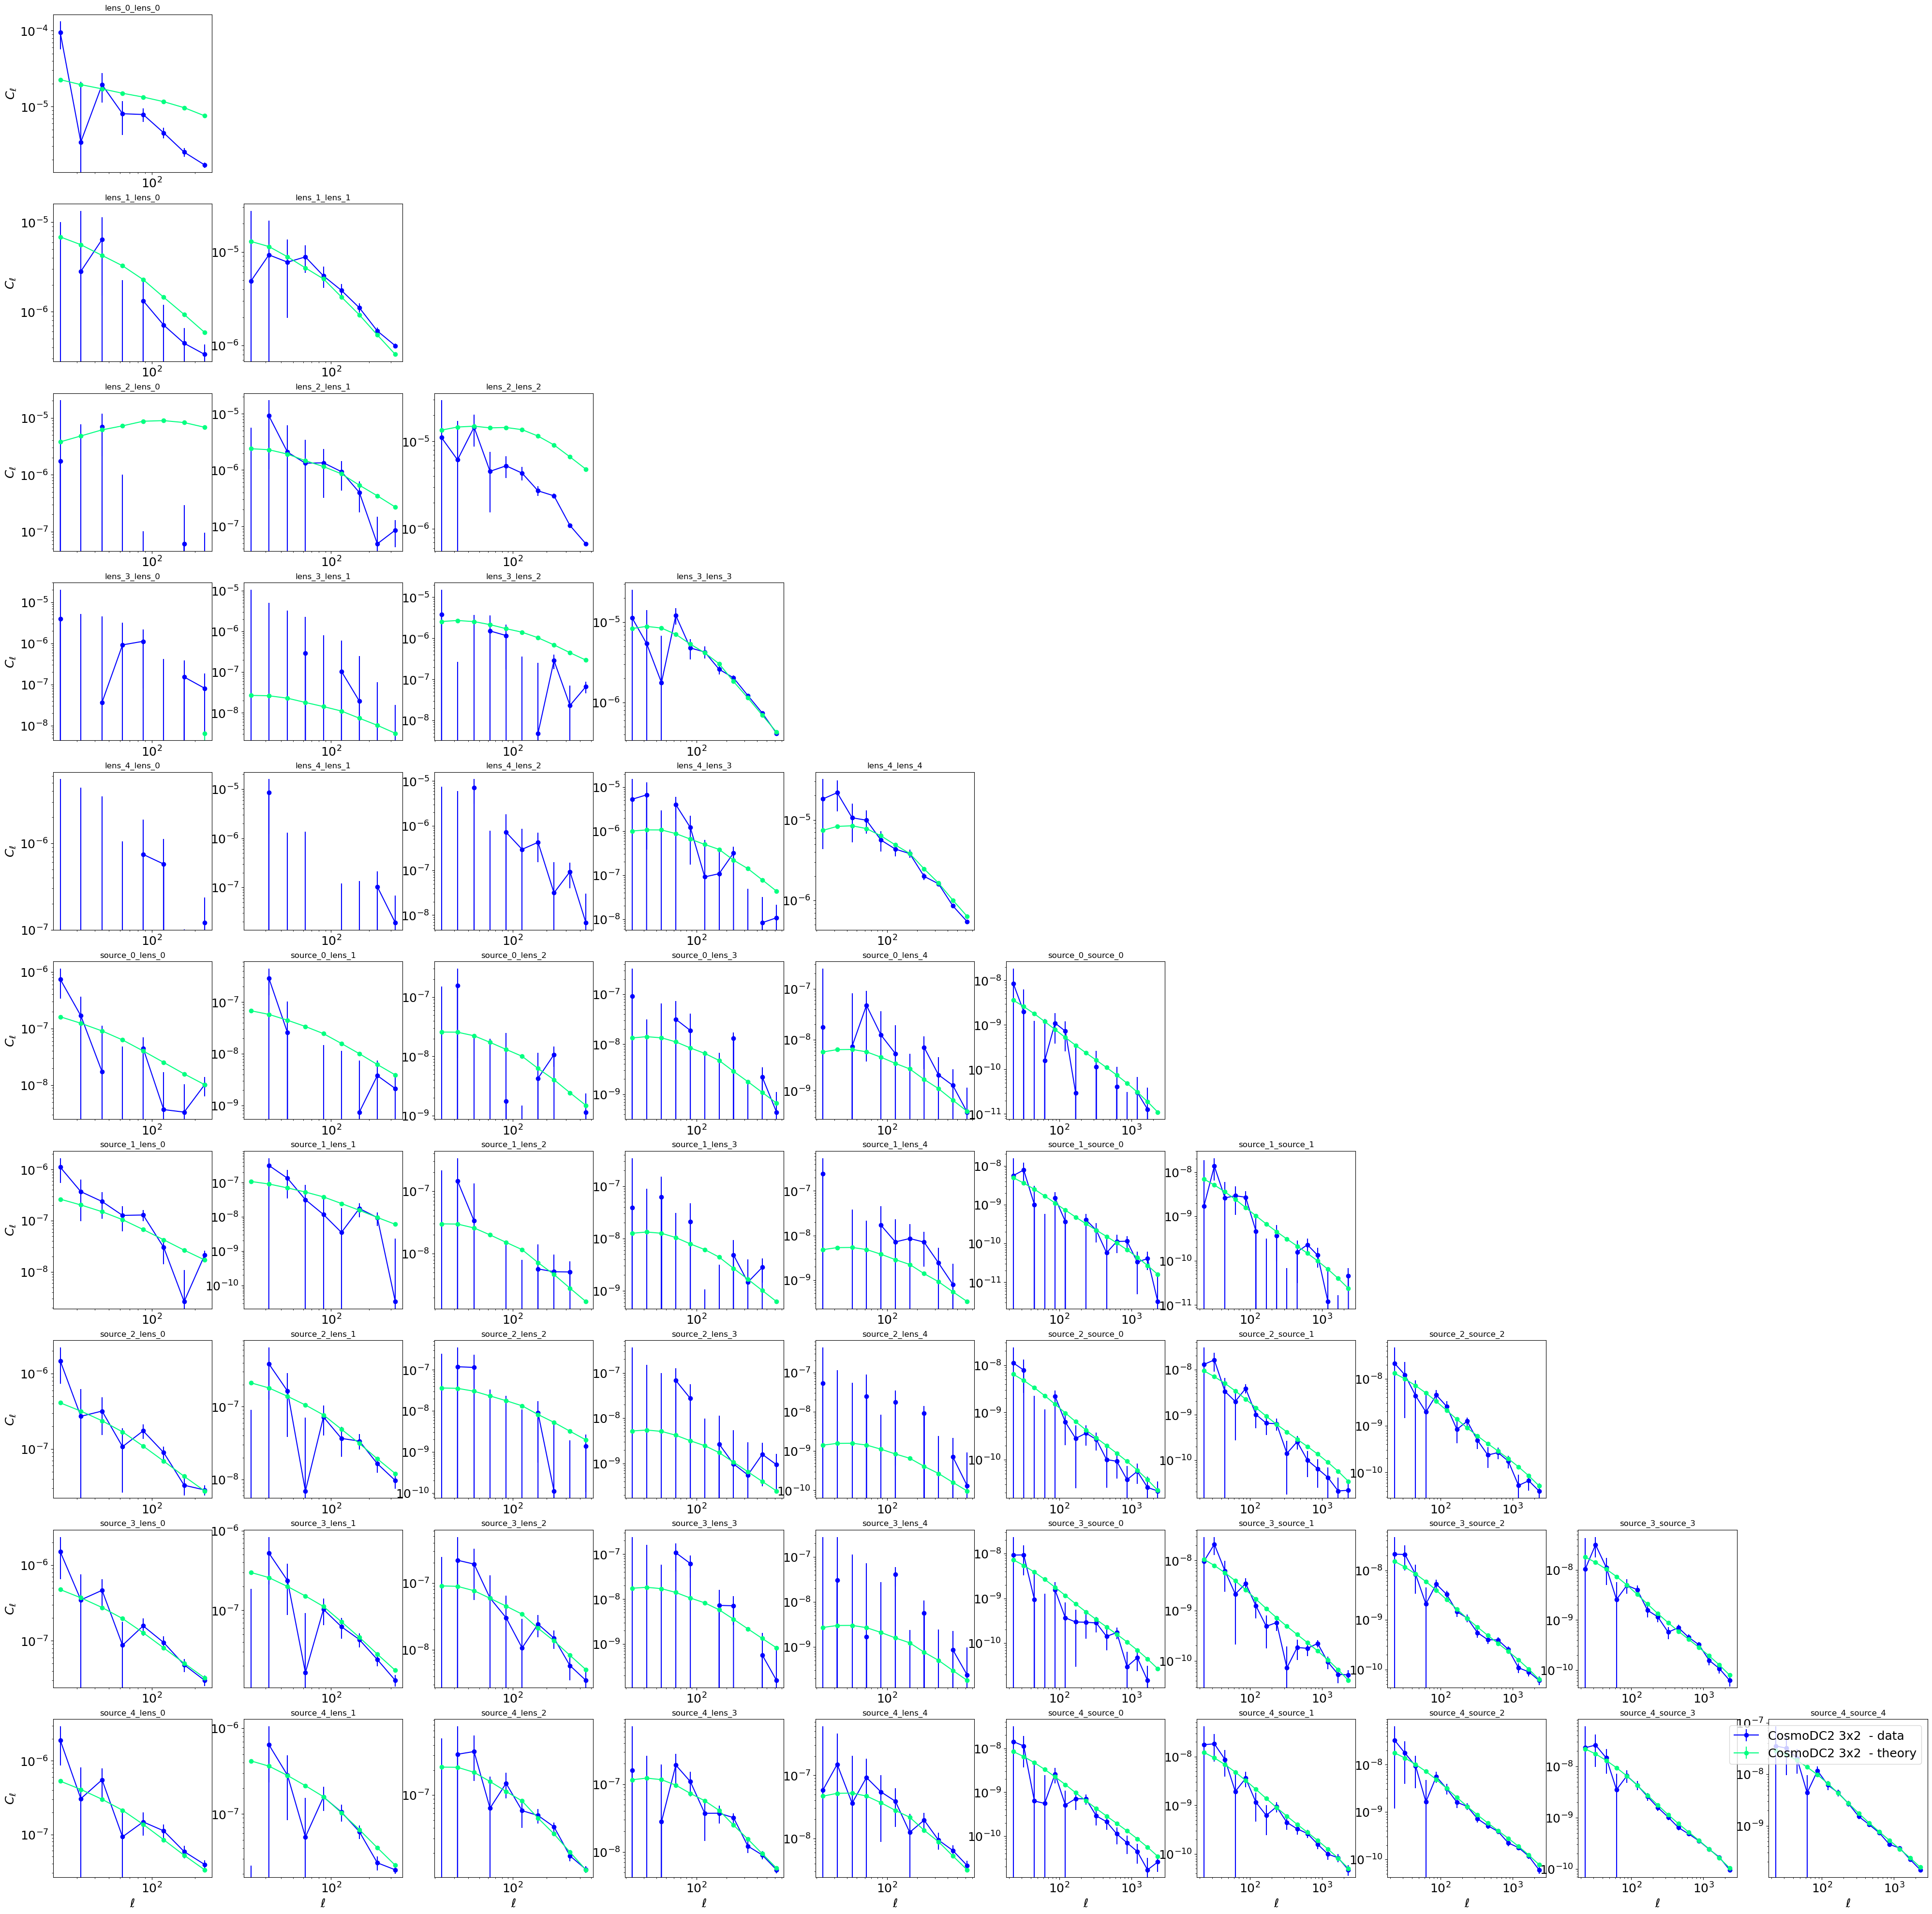

In [14]:
pacc.plot_cls([[cle_3x2, t_cle_3x2]], cle_3x2.pairs)

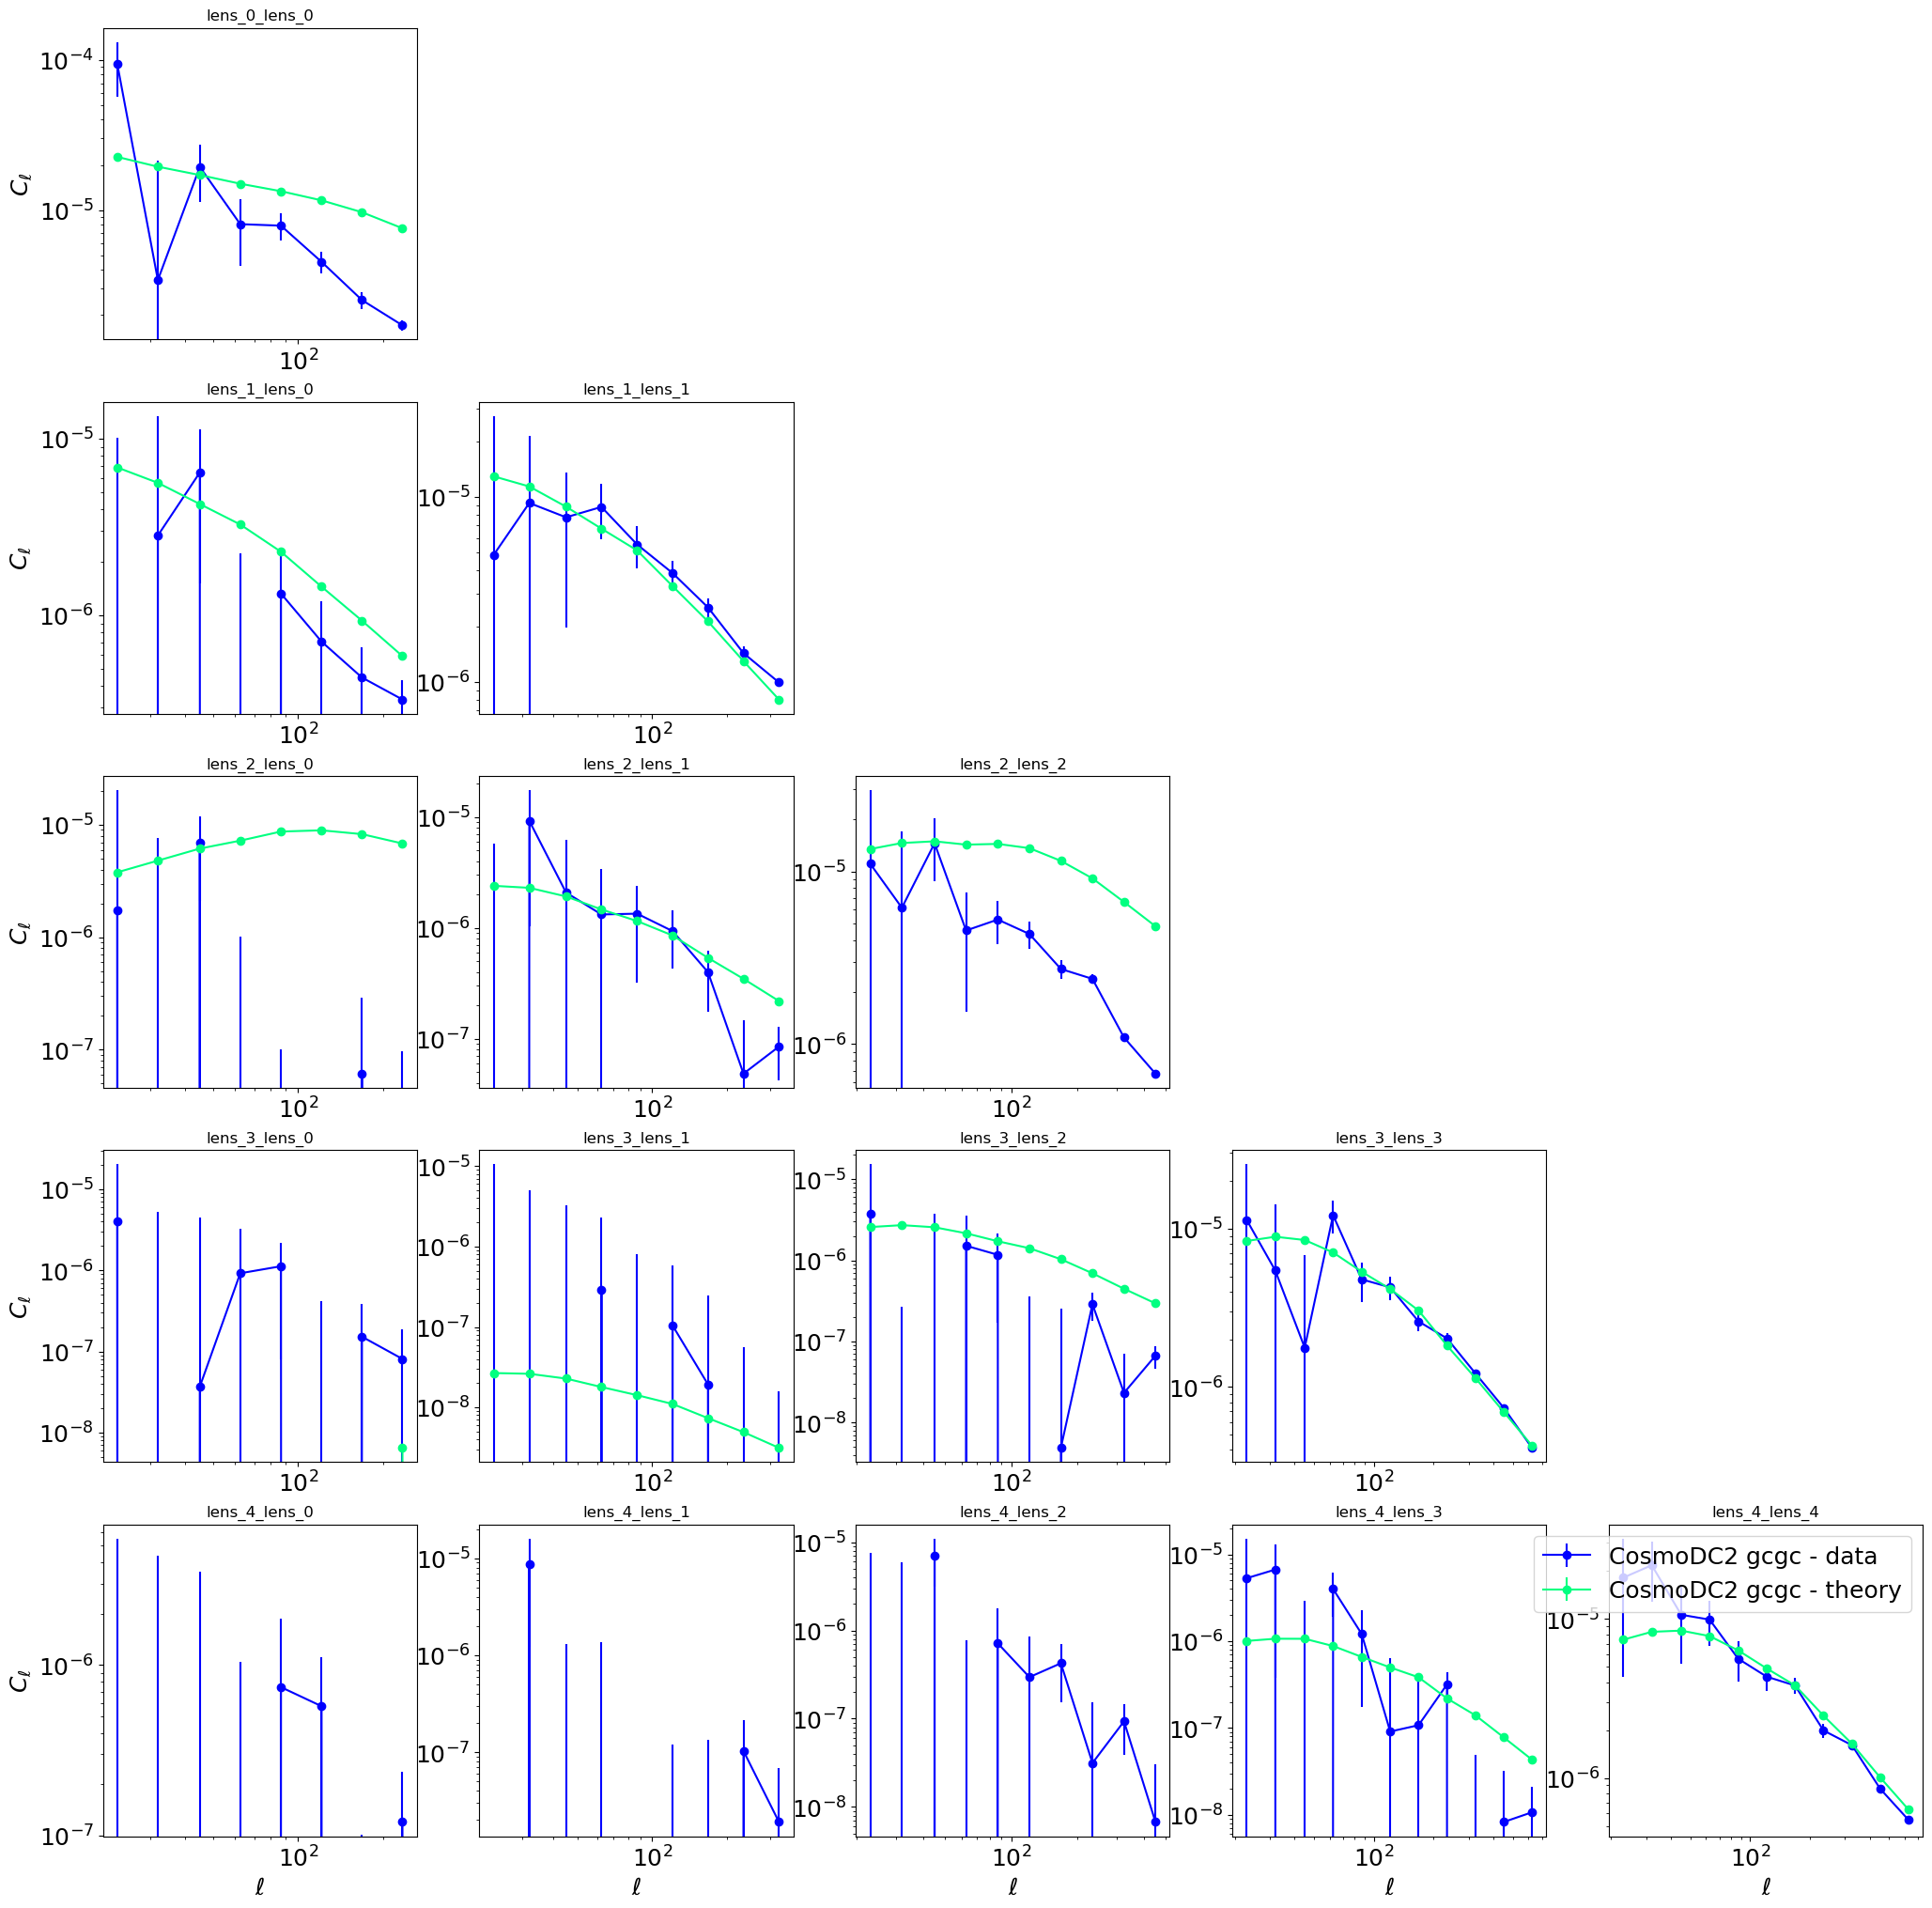

In [15]:
pacc.plot_cls([[cle_gcgc, t_cle_gcgc]], cle_gcgc.pairs)

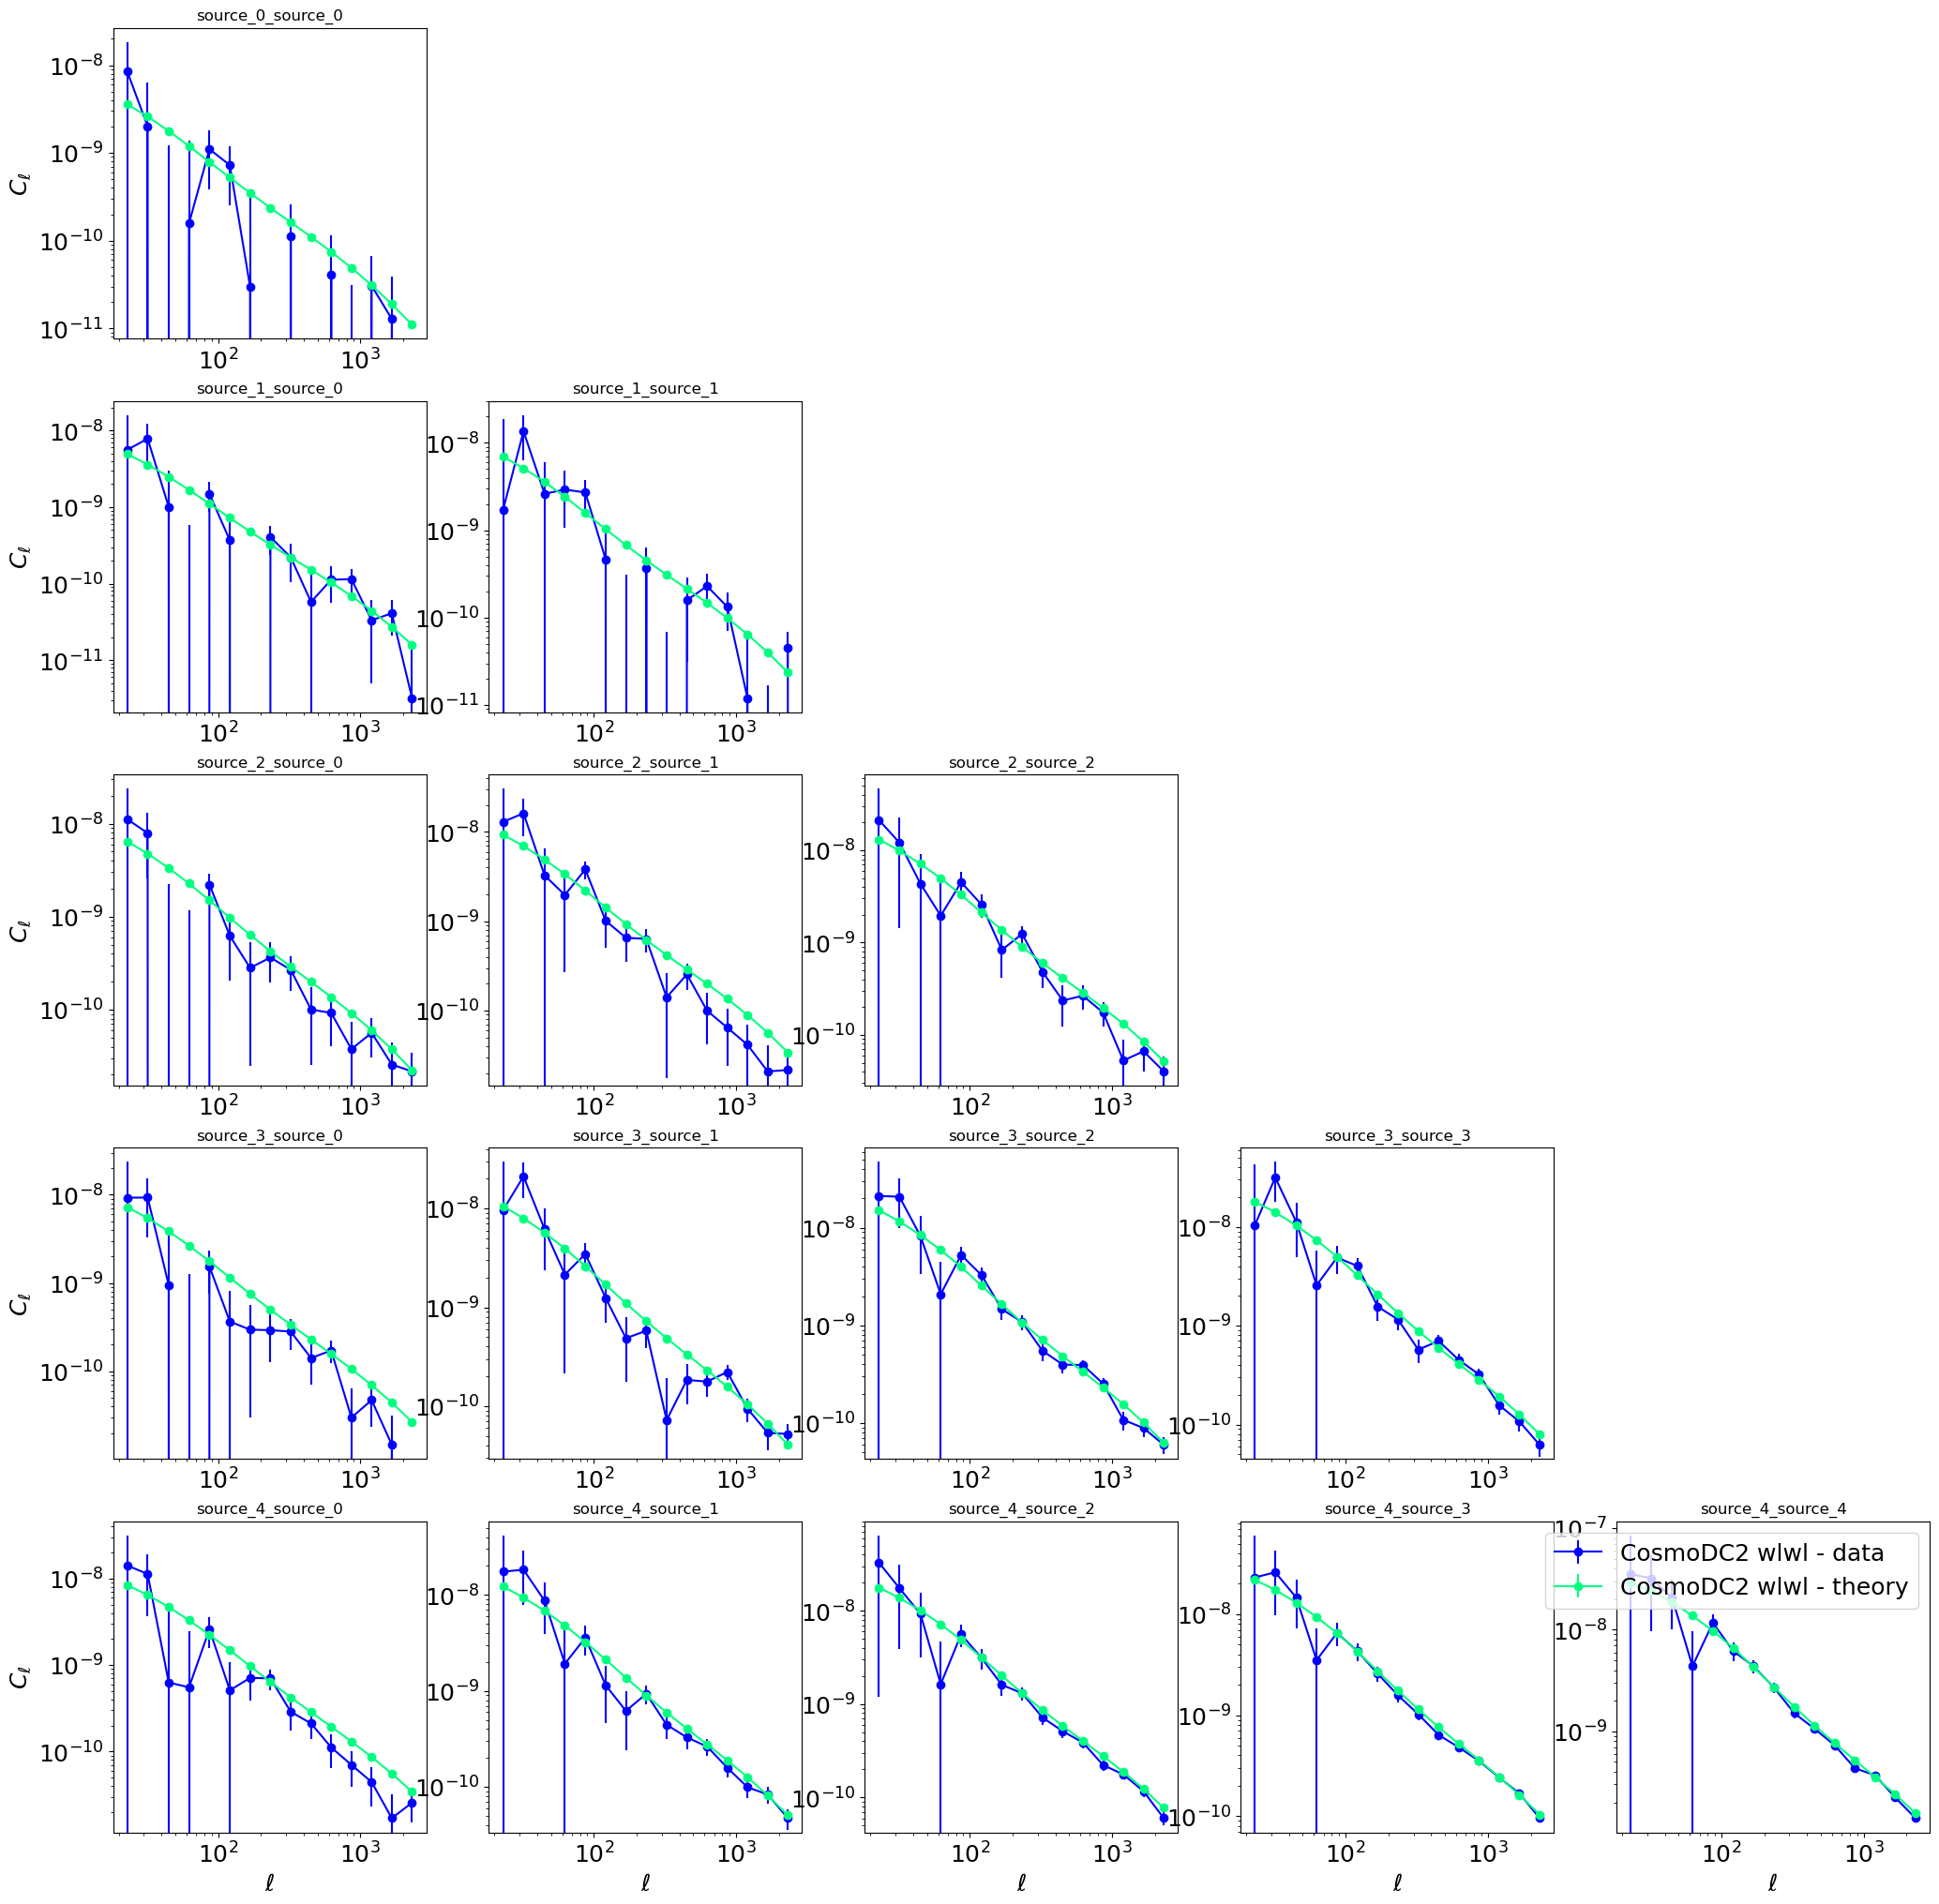

In [16]:
pacc.plot_cls([[cle_wlwl, t_cle_wlwl]], cle_wlwl.pairs)

## Load Chains

In [17]:
def add_chains(paths, start=1, stop=100):
    chains = []
    for path in paths:
        i = start
        while (os.path.isfile(path+"chain_{}.csv".format(i))) & (i<=stop):
            chain = pd.read_csv(path+"chain_{}.csv".format(i))
            chains.append(chain)
            i += 1
    return pd.concat(chains)

In [40]:
path_3x2_nomarg = "chains_right_nzs/nomarg/CosmoDC2_3x2_nomarg_TAP_0.65/"
path_wlwl_nomarg = "chains_right_nzs/nomarg/CosmoDC2_wlwl_nomarg_TAP_0.65/"
path_gcgc_nomarg = "chains_right_nzs/nomarg/CosmoDC2_gcgc_nomarg_TAP_0.65/"

path_wlwl_dz_ana = "chains_right_nzs/analytical/CosmoDC2_wlwl_ana_TAP_0.65/"

path_wlwl_dz_num = "chains_right_nzs/numerical/CosmoDC2_wlwl_dz_num_TAP_0.65/"

In [41]:
chain_wlwl_nomarg = add_chains([path_wlwl_nomarg])
chain_gcgc_nomarg = add_chains([path_gcgc_nomarg])
#chain_3x2_nomarg = add_chains([path_3x2_nomarg])

chain_wlwl_dz_ana = add_chains([path_wlwl_dz_ana])

chain_wlwl_dz_num = add_chains([path_wlwl_dz_num])

## Posteriors

In [20]:
labels_dict = {'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               'σ8': '\sigma_8',
               'S8': 'S_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               
               'DESgc__0_dz': 'dz_{DESY1gc \, 0}',
               'DESgc__1_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_dz': 'dz_{DESY1gc \, 4}',
               
               'DESwl__0_dz': 'dz_{DESY1wl \, 0}',
               'DESwl__1_dz': 'dz_{DESY1wl \, 1}',
               'DESwl__2_dz': 'dz_{DESY1wl \, 2}',
               'DESwl__3_dz': 'dz_{DESY1wl \, 3}',
               
               'DESgc__0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_b': 'b_{DESY1 \, 1}',
               'DESgc__2_b': 'b_{DESY1 \, 2}',
               'DESgc__3_b': 'b_{DESY1 \, 3}',
               'DESgc__4_b': 'b_{DESY1 \, 4}',
               
               'DESwl__0_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_m': 'm_{DESY1 \, 3 }',
               
               'DESwl__0_b': 'b_{DESY1 \, 0 }',
               'DESwl__1_b': 'b_{DESY1 \, 1 }',
               'DESwl__2_b': 'b_{DESY1 \, 2 }', 
               'DESwl__3_b': 'b_{DESY1 \, 3 }'}

In [21]:
def make_chain(file, label, ranges=dict({}), weight=False, labels_dict=labels_dict):
    params = np.array(list(file.keys()))
    names = []
    labels = []
    samples = []
    print(label)
    for param in params:
        #print(param)
        if param in labels_dict.keys():
            #print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])
    if ('σ8' in params) & ('Ωm' in params):
        #print('S8')
        names.append('S8')
        labels.append(labels_dict['S8'])
        samples.append(file['σ8']*np.sqrt(file['Ωm']/0.3))

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    if weight == True:
        if "log_density" in params:
            print("applying weights")
            ws = np.array(file['log_density'])
    else:
        ws = None
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges, weights=ws,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [59]:
samples_wlwl_dz_ana = make_chain(chain_wlwl_dz_ana, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical")

CosmoDC2 WLWL - $\Delta_z + w_z$ Analytical
Removed no burn in


In [60]:
samples_wlwl_dz_num = make_chain(chain_wlwl_dz_num, r"CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical")

CosmoDC2 WLWL - $\Delta_z + w_z$ Numerical
Removed no burn in


In [61]:
samples_wlwl_nomarg = make_chain(chain_wlwl_nomarg, "CosmoDC2 WLWL - Fixed")
samples_gcgc_nomarg = make_chain(chain_gcgc_nomarg, "CosmoDC2 GCGC - Fixed")
#samples_3x2_nomarg  = make_chain(chain_3x2_nomarg,  "3x2 nomarg")

CosmoDC2 WLWL - Fixed
Removed no burn in
CosmoDC2 GCGC - Fixed
Removed no burn in


In [62]:
prat_markers = {'h': 0.7189925511925751,
               'Ωm': 0.2734714358876248,
               'Ωb': 0.042170616570847225,
               'ns': 0.9965136823002241,
               'σ8': 0.7790071910238021}
prat_markers['S8'] = prat_markers['σ8']*np.sqrt(prat_markers['Ωm']/0.3)

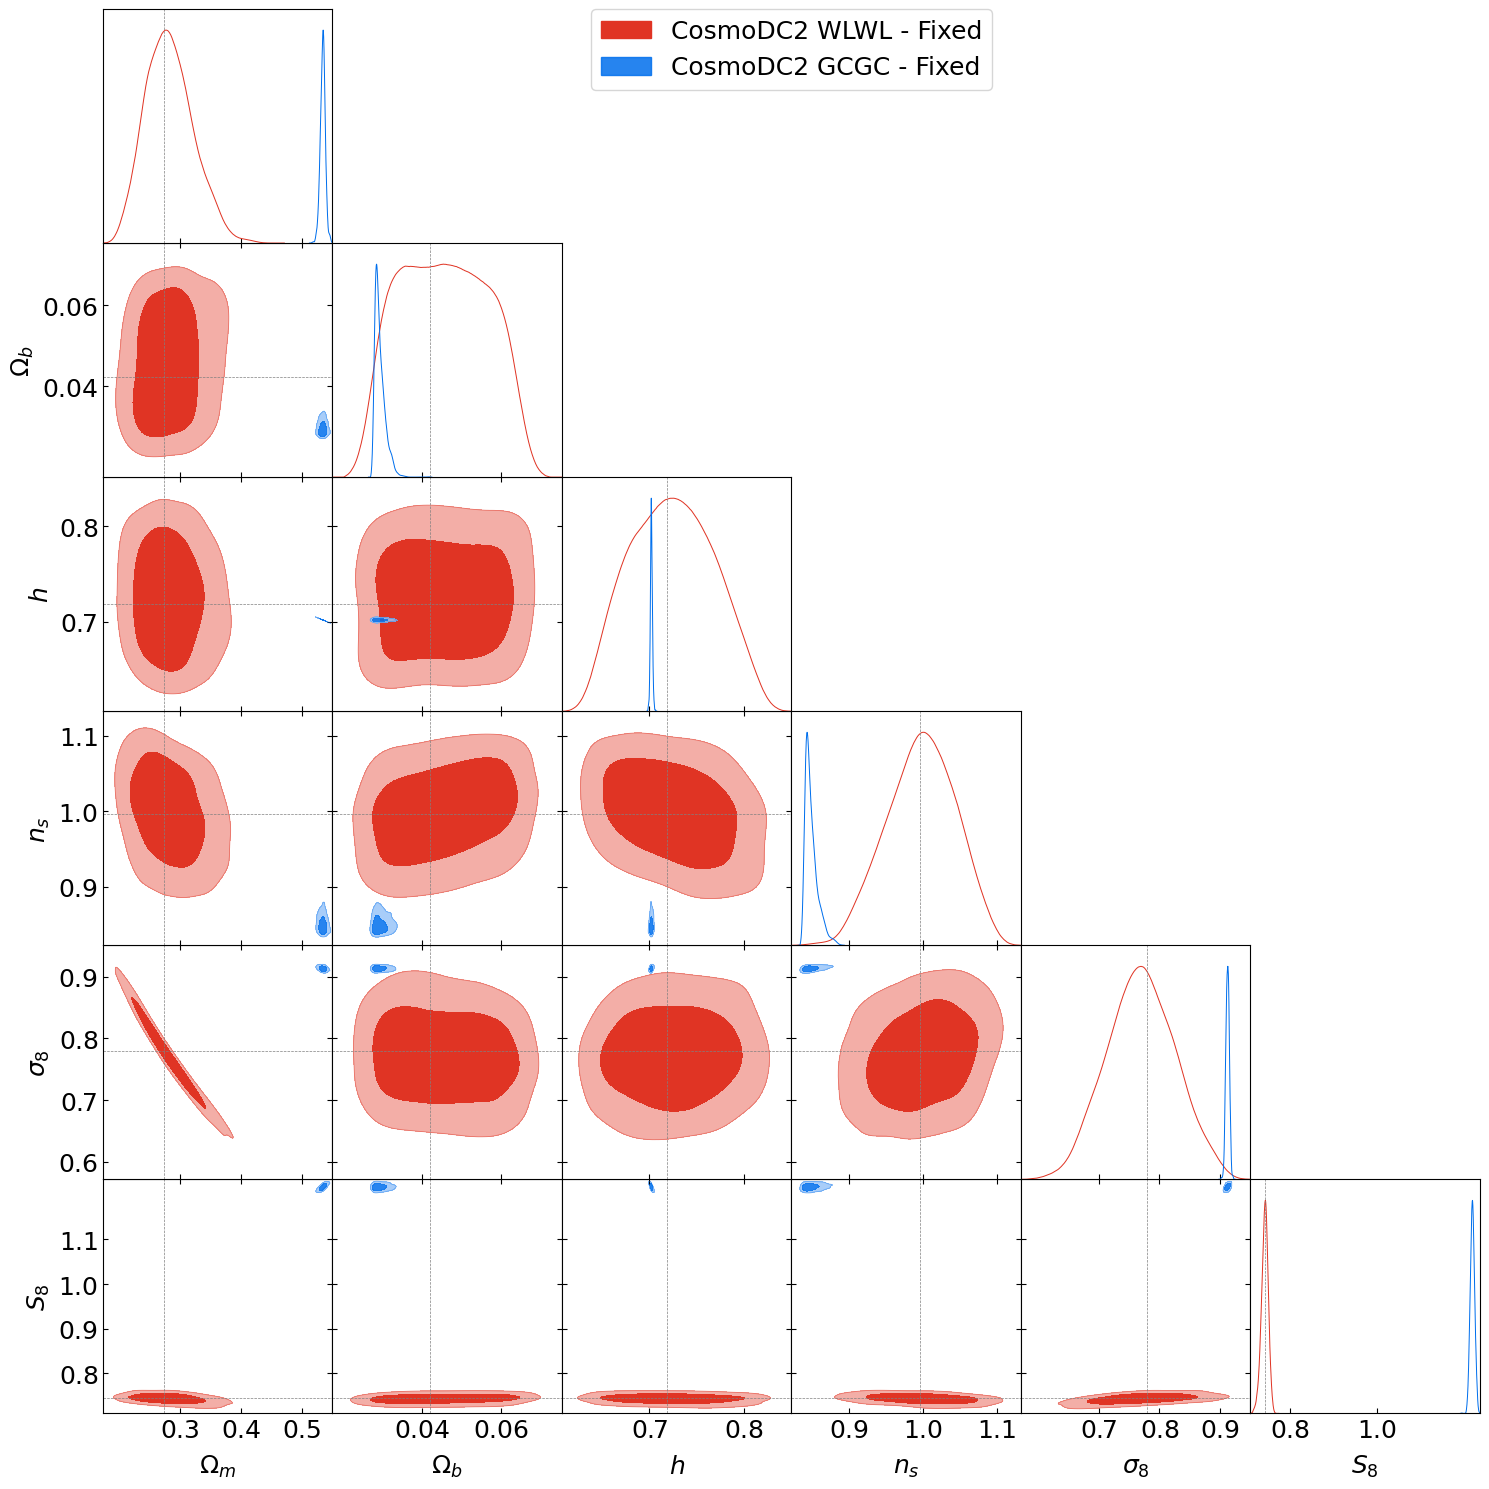

In [63]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_nomarg,
                 samples_gcgc_nomarg],
                 #samples_3x2_nomarg],
                 ['Ωm', 'Ωb', 'h', 'ns', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

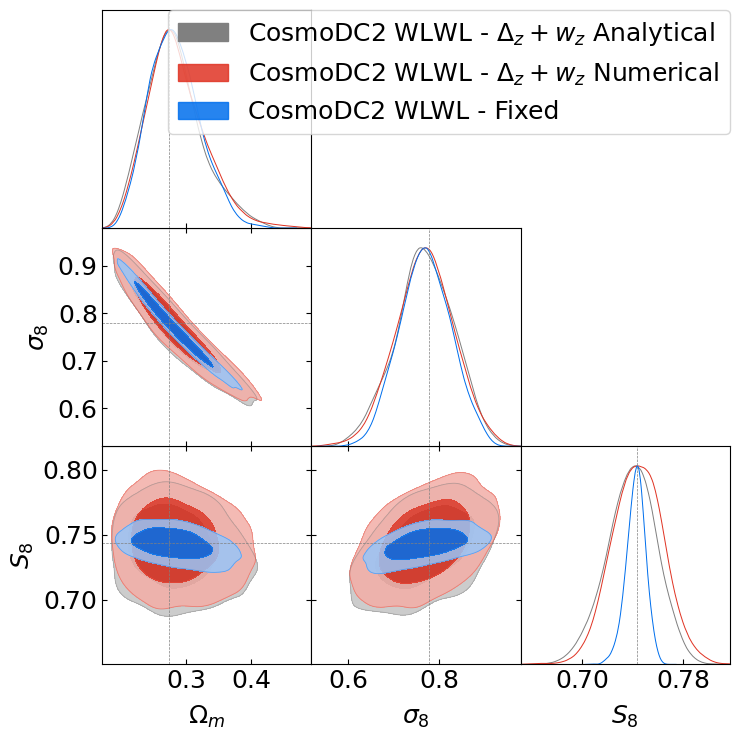

In [64]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.settings.axes_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 20
g.triangle_plot([samples_wlwl_dz_ana,
                 samples_wlwl_dz_num,
                 samples_wlwl_nomarg],
                 #samples_3x2_nomarg],
                 ['Ωm', 'σ8', 'S8'],
                 markers=prat_markers,
                 filled=True)

## Likelihood

In [26]:
data_wlwl = np.transpose(np.array(pd.read_csv("./data/CosmoDC2/CosmoDC2_wlwl_theory_photo_bpz_best.csv")))[0]
data_gcgc = np.transpose(np.array(pd.read_csv("./data/CosmoDC2/CosmoDC2_gcgc_theory_photo_bpz_best.csv")))[0]

In [27]:
k = 0
data_wlwl_segs = []
for cls in cle_wlwl.data:
    i = len(cls)
    data_wlwl_segs.append(data_wlwl[k:k+i])
    k = k+i

k = 0
data_gcgc_segs = []
for cls in cle_gcgc.data:
    i = len(cls)
    data_gcgc_segs.append(data_gcgc[k:k+i])
    k = k+i

In [28]:
cle_wlwl.data = data_wlwl_segs
#cle_gcgc.data = data_gcgc_segs

In [29]:
lkl_wlwl_nomarg  = np.transpose(np.transpose(np.array(chain_wlwl_nomarg))[8:233])
lkl_gcgc_nomarg  = np.transpose(np.transpose(np.array(chain_gcgc_nomarg))[8:149])
#lkl_3x2_nomarg   = np.transpose(np.transpose(np.array(chain_3x2_nomarg))[8:149])

In [30]:
xi2_wlwl_nomarg = np.array(chain_wlwl_nomarg['lp'])
xi2_gcgc_nomarg = np.array(chain_gcgc_nomarg['lp'])
#xi2_3x2_nomarg  = np.array(chain_3x2_nomarg['lp'])

In [31]:
lkl_wlwl_nomarg_m, lkl_wlwl_nomarg_s = np.mean(lkl_wlwl_nomarg, axis=1), np.std(lkl_wlwl_nomarg, axis=1)
lkl_gcgc_nomarg_m, lkl_gcgc_nomarg_s = np.mean(lkl_gcgc_nomarg, axis=1), np.std(lkl_gcgc_nomarg, axis=1)

In [32]:
lkl_wlwl_nomarg_cles = [pacc.ClTheoryEnsemble(cle_wlwl, np.array(lkl_wlwl_nomarg[i])) for i in range(len(lkl_wlwl_nomarg))] 
lkl_gcgc_nomarg_cles = [pacc.ClTheoryEnsemble(cle_gcgc, np.array(lkl_gcgc_nomarg[i])) for i in range(len(lkl_gcgc_nomarg))]

In [33]:
sel = np.random.choice(len(lkl_wlwl_nomarg), 100)

In [34]:
lkl_wlwl_nomarg_cles = np.array(lkl_wlwl_nomarg_cles)[sel]
lkl_gcgc_nomarg_cles = np.array(lkl_gcgc_nomarg_cles)[sel]

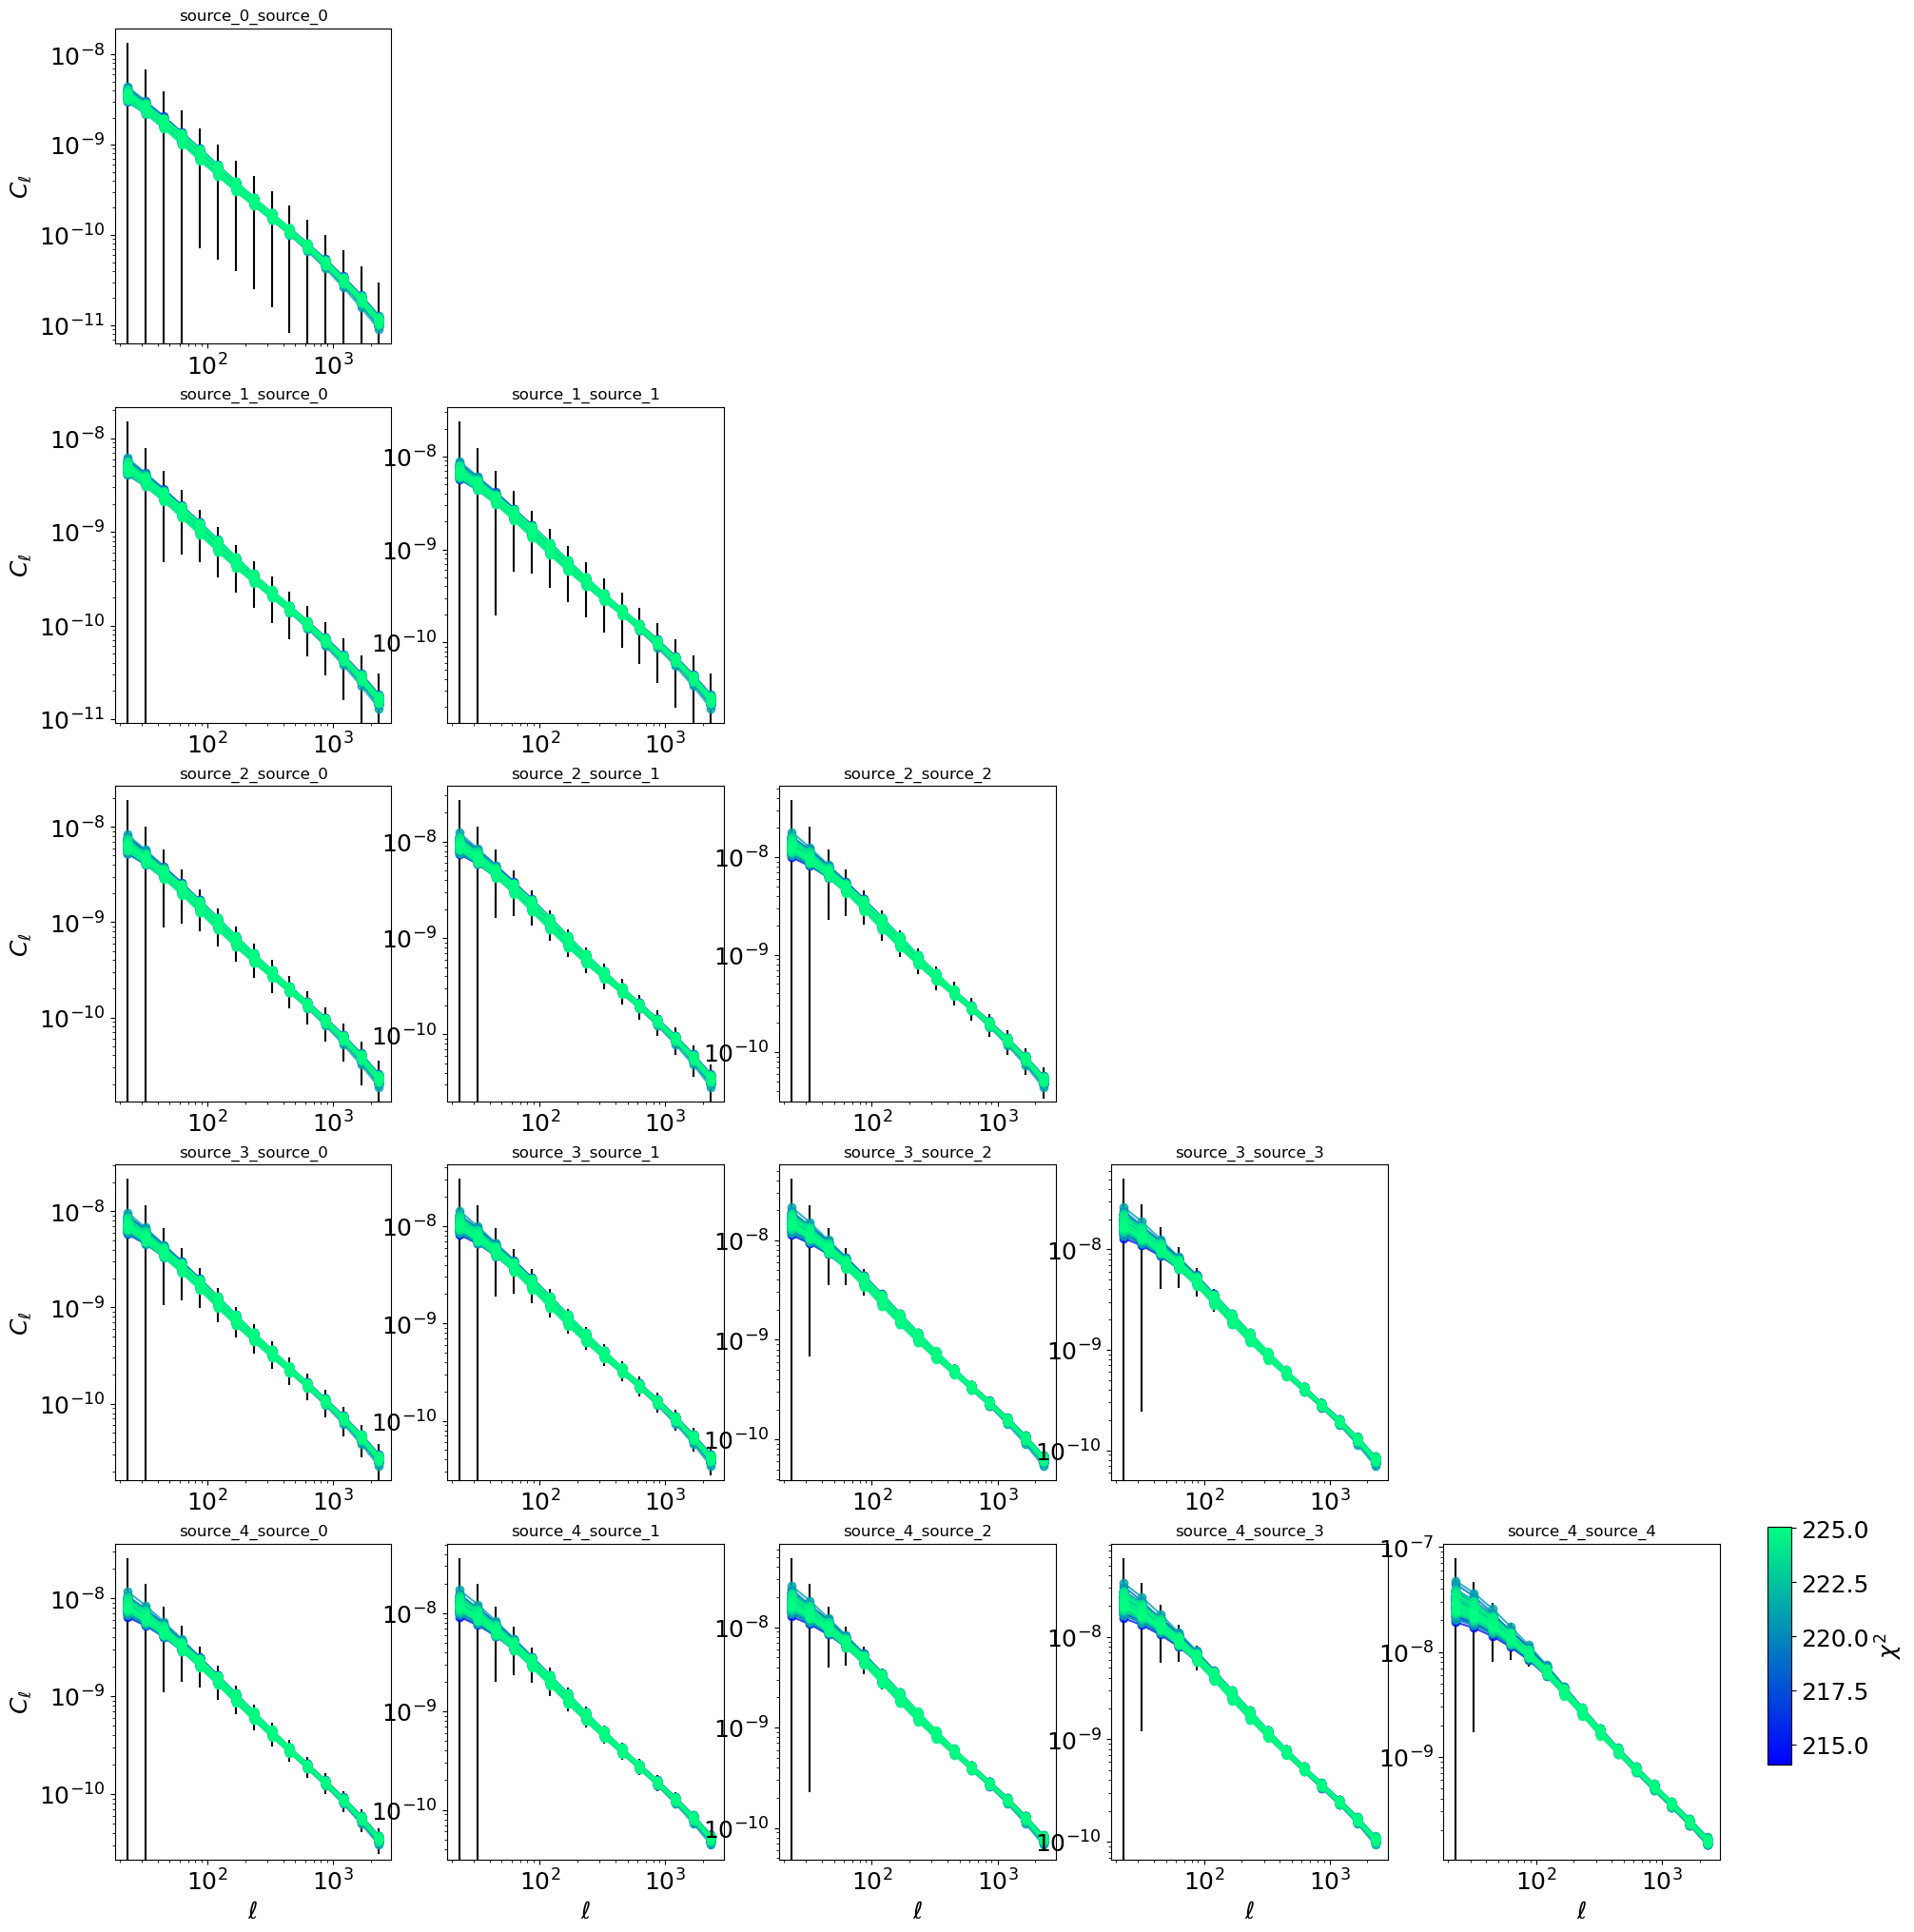

In [35]:
pacc.plot_cls([[cle_wlwl], lkl_wlwl_nomarg_cles], cle_wlwl.pairs,
              configs=[
                  {"colors":['black'], "show_legend":False},
                  {"alpha":0.8, "Xi2s":-xi2_wlwl_nomarg[sel],
                "show_legend":False, "show_colobar":True}])

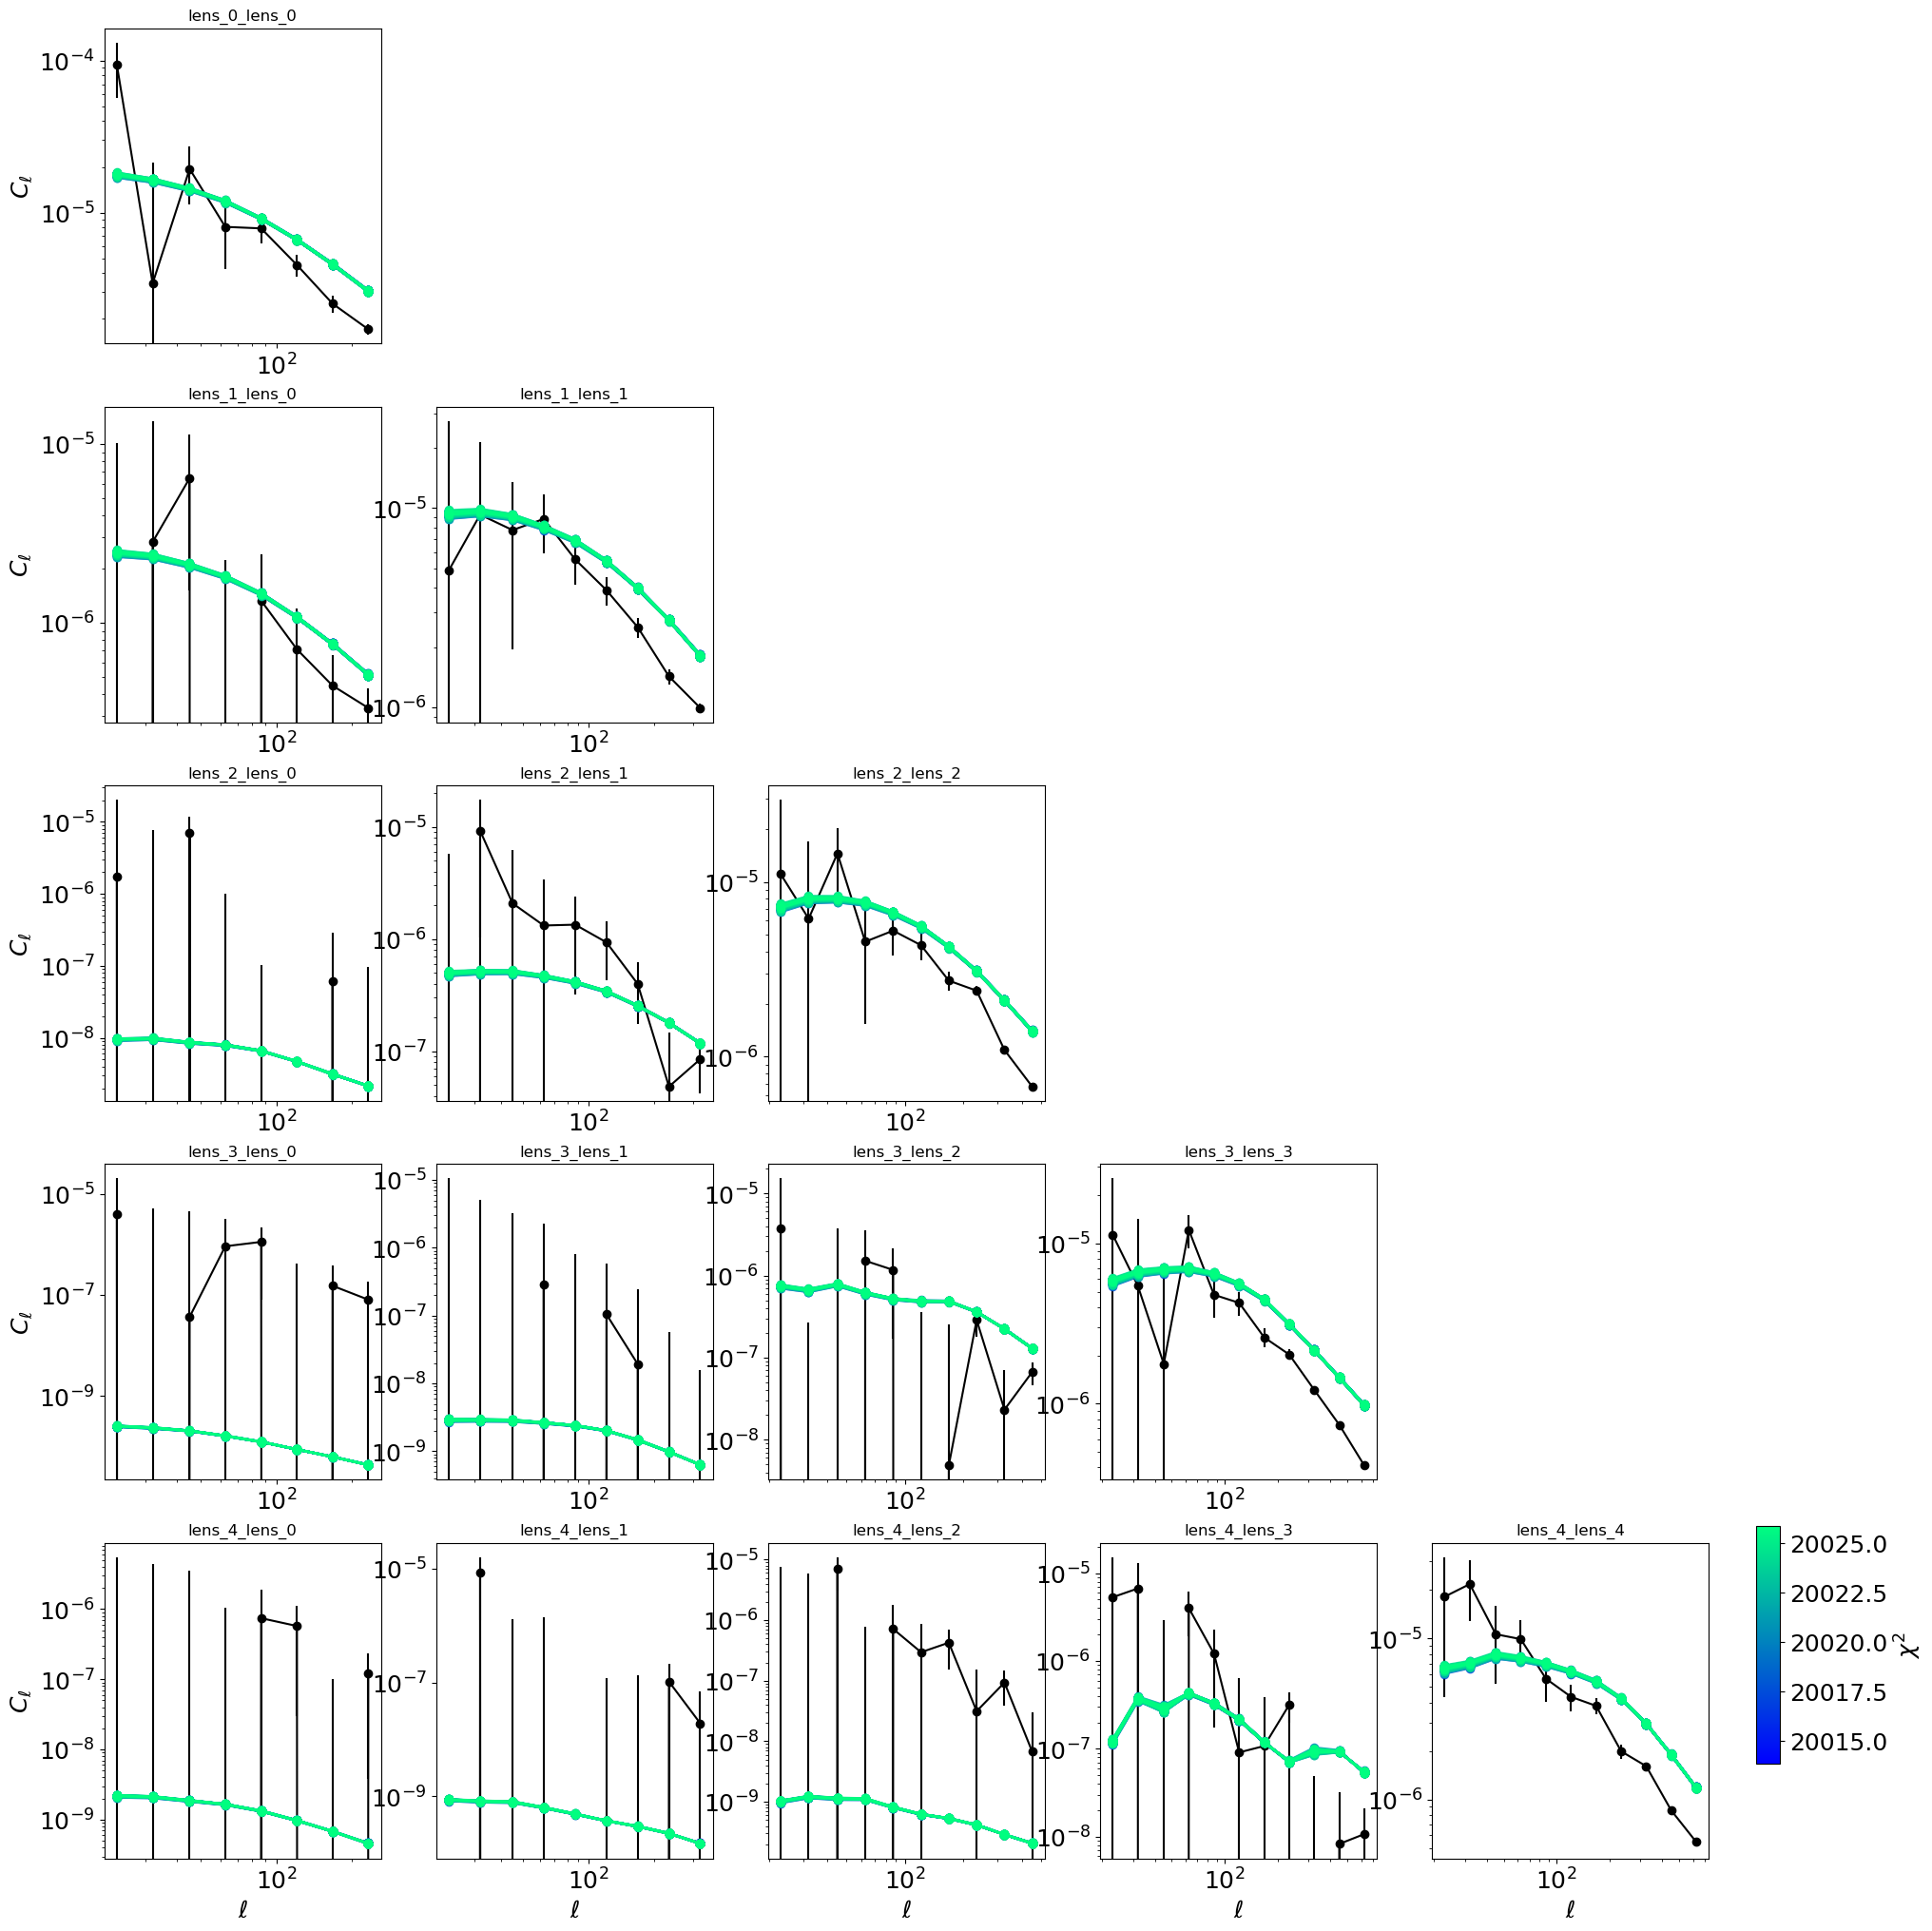

In [36]:
pacc.plot_cls([[cle_gcgc], lkl_gcgc_nomarg_cles], cle_gcgc.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_gcgc_nomarg[sel],
                    "show_legend":False, "show_colobar":True}])


/home/jaimerz/anaconda3/envs/tutorials/lib/python3.9/site-packages/pacc/__init__.py:100: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis[i, j].set_yscale("log")


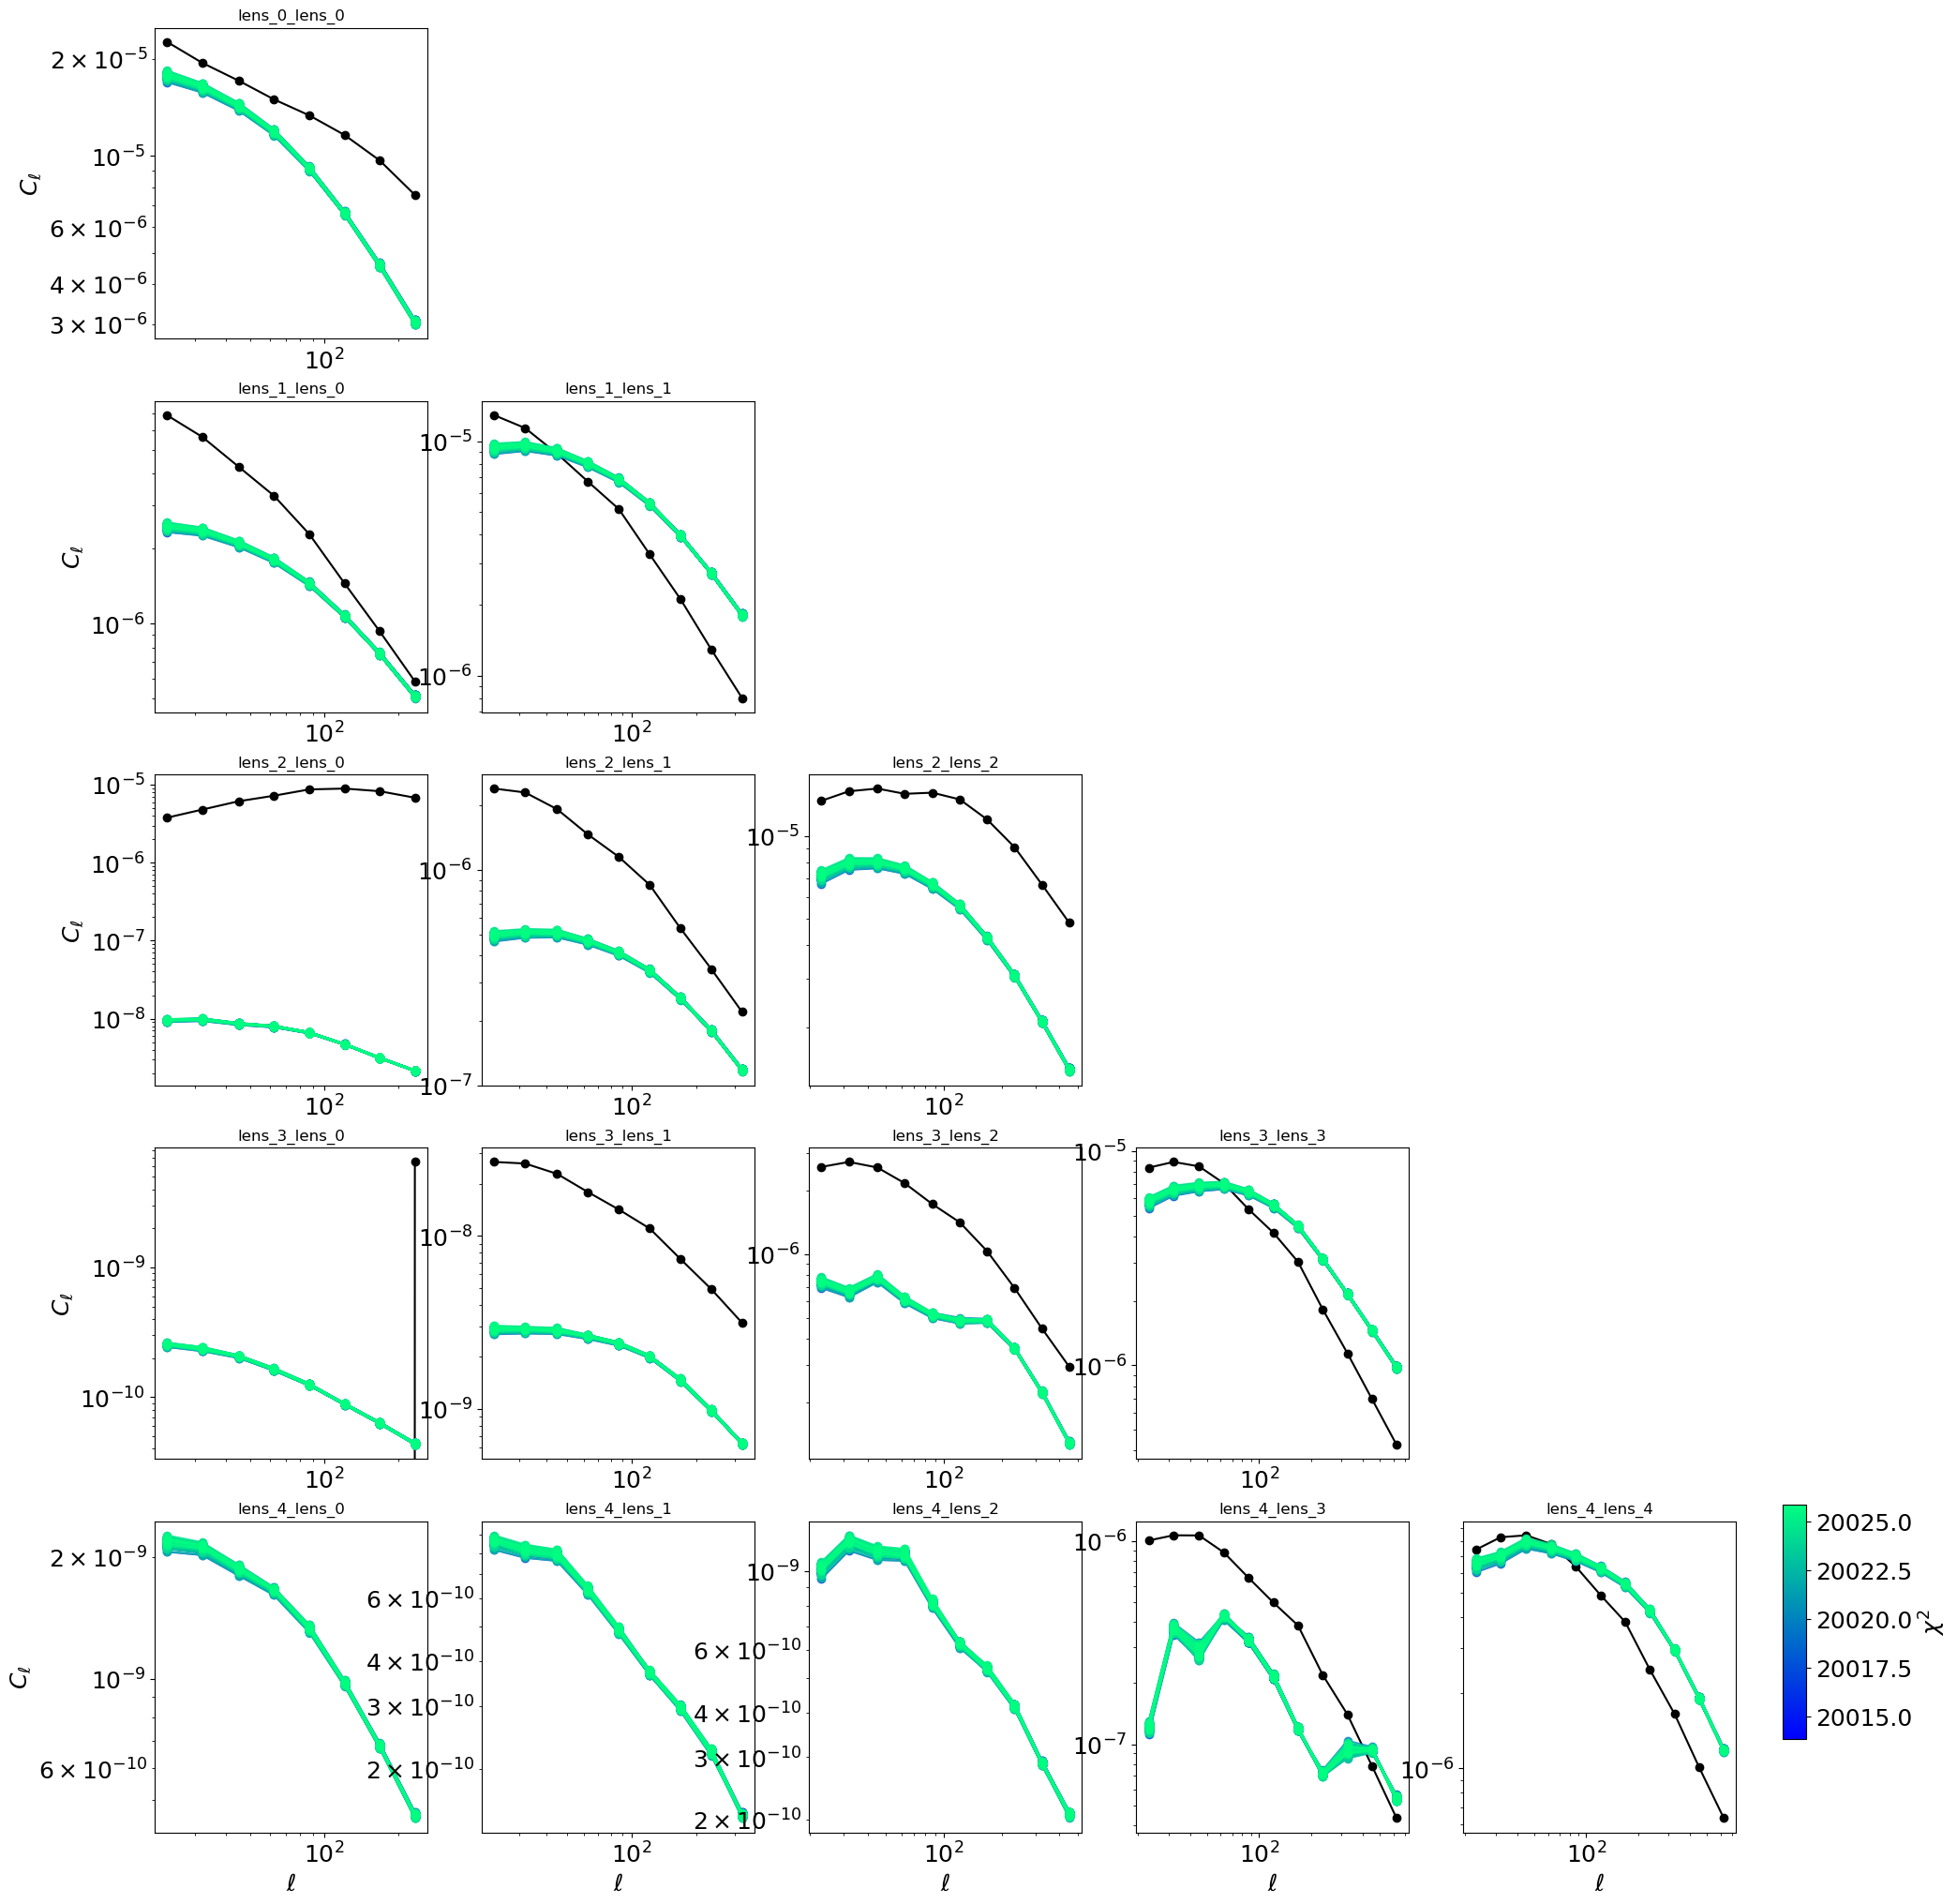

In [37]:
pacc.plot_cls([[t_cle_gcgc], lkl_gcgc_nomarg_cles], cle_gcgc.pairs,
                configs=[
                    {"colors":['black'], "show_legend":False},
                    {"alpha":0.8, "Xi2s":-xi2_gcgc_nomarg[sel],
                    "show_legend":False, "show_colobar":True}])
